In [271]:
import numpy as np
import math
import pandas as pd
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates as pc 
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas


In [220]:
df = pd.read_csv('gpa_iq.csv')
column_to_drop = 'obs'
df = df.drop(column_to_drop, axis=1)
df.head(3)

,gpa,iq,gender,concept
0,7.940,111,2,67
1,8.292,107,2,43
2,4.643,100,2,52


In [221]:
df.shape

(78, 4)

In [222]:
df.head()
a = df.values
b = np.zeros(50)
for i in range(50):
    b[i] = a[i,1]
b = np.sort(b)


In [223]:
b1 = np.zeros((8,4))
b2 = np.zeros((8,4))
b3 = np.zeros((8,4))

In [224]:
for i in range(0,30,4): 
  k=int(i/4) 
  mean=((b[i] + b[i+1] + b[i+2] + b[i+3] )/4)  
  for j in range(4):
      b1[k,j]=mean 
      
print("mean", b1)

mean [[ 90.75  90.75  90.75  90.75]
 [ 99.75  99.75  99.75  99.75]
 [103.25 103.25 103.25 103.25]
 [106.   106.   106.   106.  ]
 [108.5  108.5  108.5  108.5 ]
 [111.25 111.25 111.25 111.25]
 [113.25 113.25 113.25 113.25]
 [114.75 114.75 114.75 114.75]]


In [225]:
for i in range (0,30,4):
    k=int(i/4)
    for j in range (4):
        if (b[i+j]-b[i]) < (b[i+3]-b[i+j]):
            b2[k,j]=b[i]
        else:
            b2[k,j]=b[i+3]   
print("Bin Boundaries: \n",b2)



Bin Boundaries: 
 [[ 86.  86.  86.  97.]
 [ 97. 102. 102. 102.]
 [102. 104. 104. 104.]
 [105. 107. 107. 107.]
 [107. 107. 110. 110.]
 [111. 111. 111. 112.]
 [113. 113. 113. 114.]
 [114. 114. 116. 116.]]


In [226]:
for i in range (0,30,4):
    k=int(i/4)
    for j in range (4):
        b3[k,j] = b[i+1]
print("Bin Median: \n",b3)

Bin Median: 
 [[ 89.  89.  89.  89.]
 [100. 100. 100. 100.]
 [103. 103. 103. 103.]
 [106. 106. 106. 106.]
 [108. 108. 108. 108.]
 [111. 111. 111. 111.]
 [113. 113. 113. 113.]
 [114. 114. 114. 114.]]


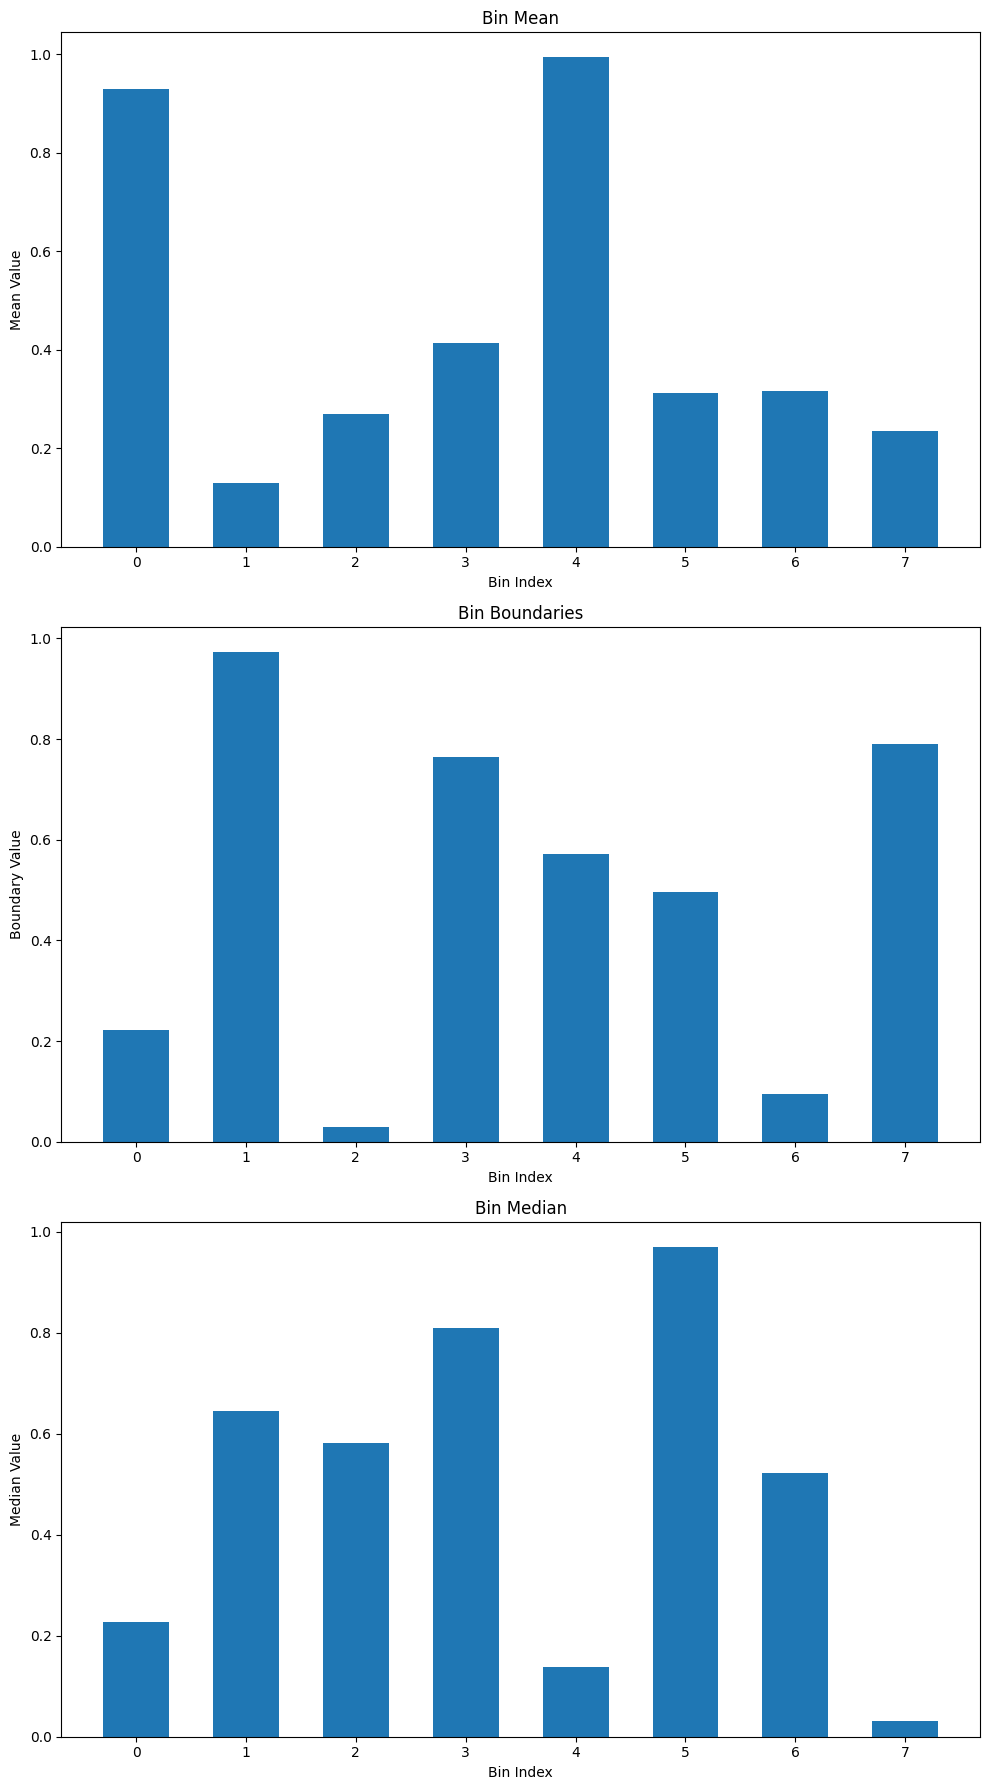

In [272]:
# Bar graph 
fig, axes = plt.subplots(3, 1, figsize=(10, 18))
axes[0].set_title("Bin Mean")
axes[0].set_xlabel("Bin Index")
axes[0].set_ylabel("Mean Value")
axes[0].set_xticks(range(8))
axes[0].bar(range(8), b1[:, 0], width=0.6)
axes[1].set_title("Bin Boundaries")
axes[1].set_xlabel("Bin Index")
axes[1].set_ylabel("Boundary Value")
axes[1].set_xticks(range(8))
axes[1].bar(range(8), b2[:, 0], width=0.6)
axes[2].set_title("Bin Median")
axes[2].set_xlabel("Bin Index")
axes[2].set_ylabel("Median Value")
axes[2].set_xticks(range(8))
axes[2].bar(range(8), b3[:, 0], width=0.6)
plt.tight_layout()
plt.show()

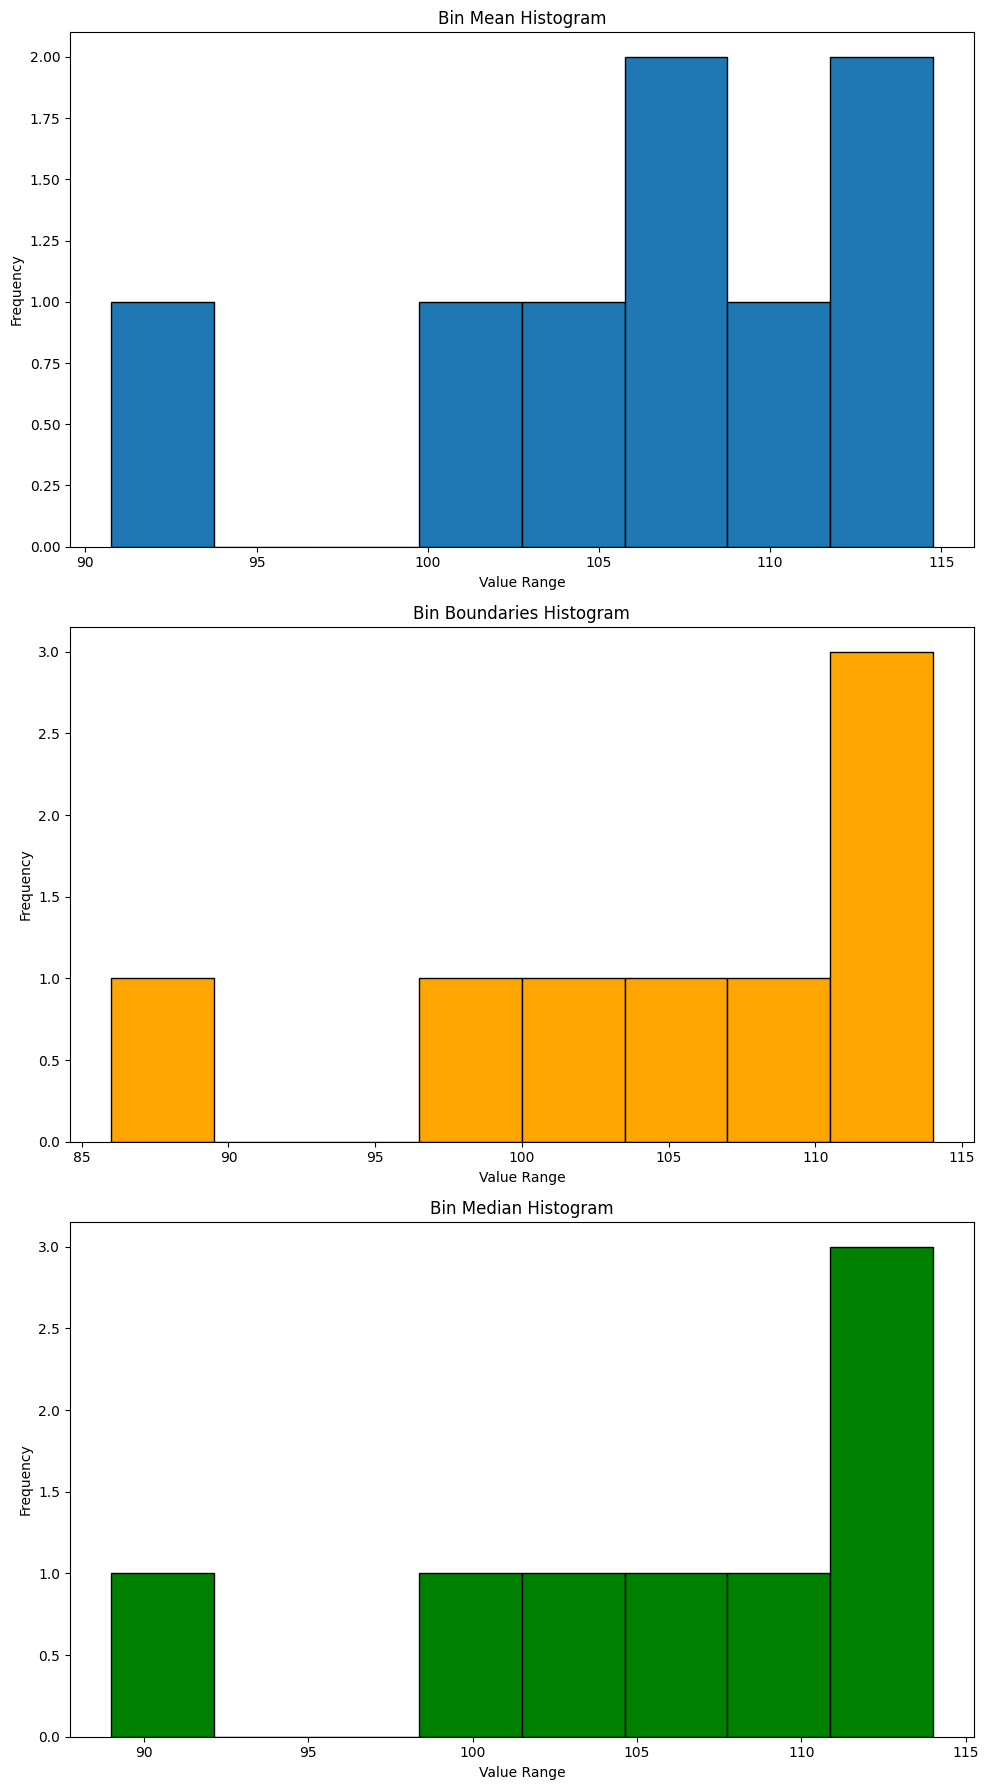

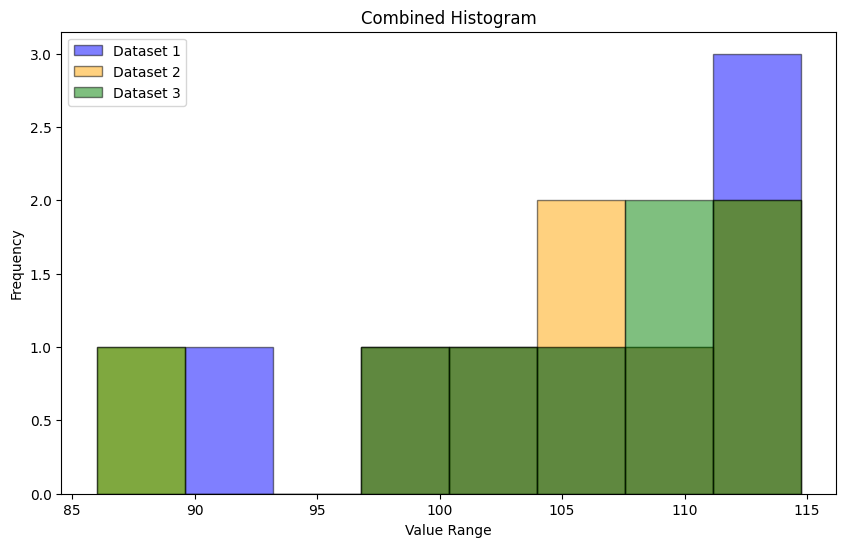

In [246]:

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Visualize Bin Mean
axes[0].hist(b1[:, 0], bins=8, edgecolor='black')
axes[0].set_title("Bin Mean Histogram")
axes[0].set_xlabel("Value Range")
axes[0].set_ylabel("Frequency")

# Visualize Bin Boundaries
axes[1].hist(b2[:, 0], bins=8, edgecolor='black' , color='orange')
axes[1].set_title("Bin Boundaries Histogram")
axes[1].set_xlabel("Value Range")
axes[1].set_ylabel("Frequency")

# Visualize Bin Median
axes[2].hist(b3[:, 0], bins=8, edgecolor='black' , color='green')
axes[2].set_title("Bin Median Histogram")
axes[2].set_xlabel("Value Range")
axes[2].set_ylabel("Frequency")

# Adjust layout
plt.tight_layout()
plt.show()

combined_data = np.concatenate((b1[:, 0], b2[:, 0], b3[:, 0]))
# Calculate histogram bins and values
hist_values, hist_bins = np.histogram(combined_data, bins=8)
# Define colors for each dataset
colors = ['blue', 'orange', 'green']
# Create the combined histogram
plt.figure(figsize=(10, 6))
plt.title("Combined Histogram")
plt.xlabel("Value Range")
plt.ylabel("Frequency")
# Plot each dataset with different colors
for i, data in enumerate([b1[:, 0], b2[:, 0], b3[:, 0]]):
    plt.hist(data, bins=hist_bins, color=colors[i], alpha=0.5, edgecolor='black', label=f'Dataset {i+1}')

plt.legend()
plt.show()

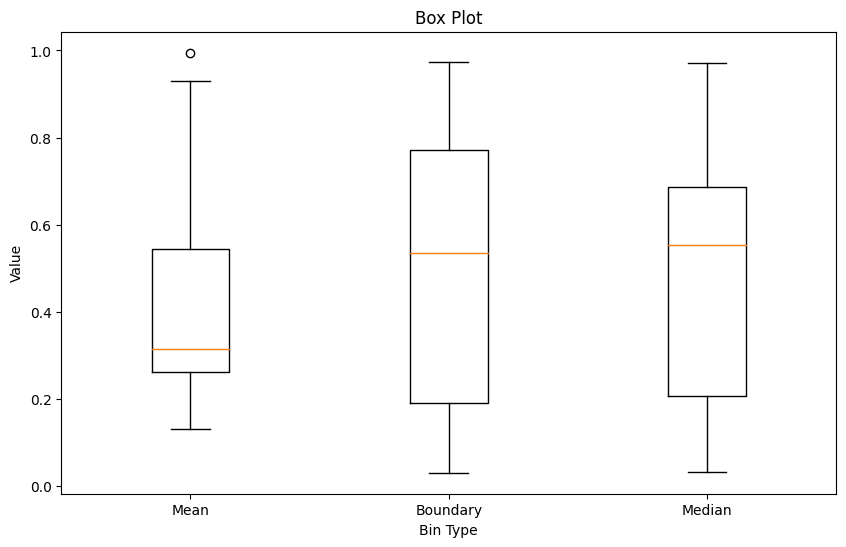

In [255]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.title("Box Plot")
plt.xlabel("Bin Type")
plt.ylabel("Value")
plt.boxplot([b1[:, 0], b2[:, 0], b3[:, 0]], labels=["Mean", "Boundary", "Median"])
plt.show()


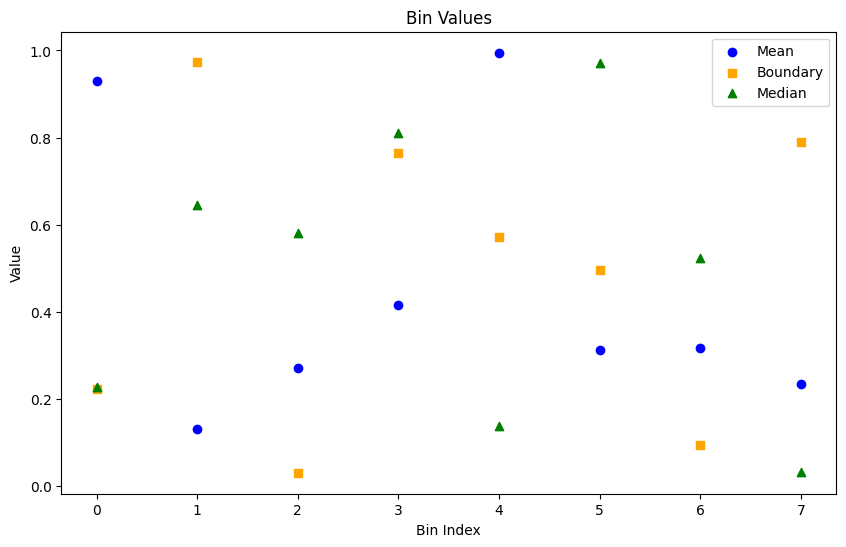

In [259]:
plt.figure(figsize=(10, 6))
plt.title("Bin Values")
plt.xlabel("Bin Index")
plt.ylabel("Value")
plt.scatter(range(8), b1[:, 0], color='blue', marker='o', label='Mean')
plt.scatter(range(8), b2[:, 0], color='orange', marker='s', label='Boundary')
plt.scatter(range(8), b3[:, 0], color='green', marker='^', label='Median')
plt.xticks(range(8))
plt.legend()
plt.show()

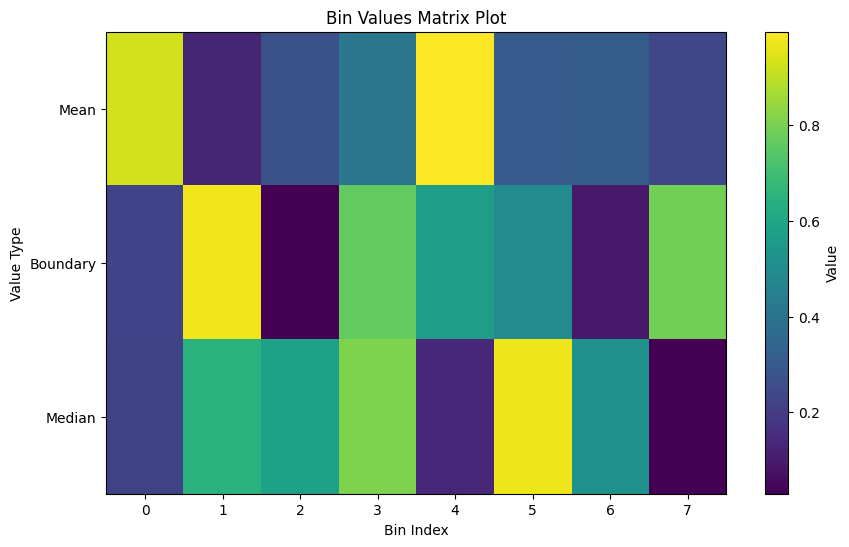

In [260]:
# matrixplot
data_matrix = np.vstack((b1[:, 0], b2[:, 0], b3[:, 0]))
plt.figure(figsize=(10, 6))
plt.title("Bin Values Matrix Plot")
plt.xlabel("Bin Index")
plt.ylabel("Value Type")
plt.xticks(range(8))
plt.yticks(range(3), ['Mean', 'Boundary','Median'])
plt.imshow(data_matrix, cmap='viridis', aspect='auto')
cbar = plt.colorbar()
cbar.set_label("Value")
plt.show()

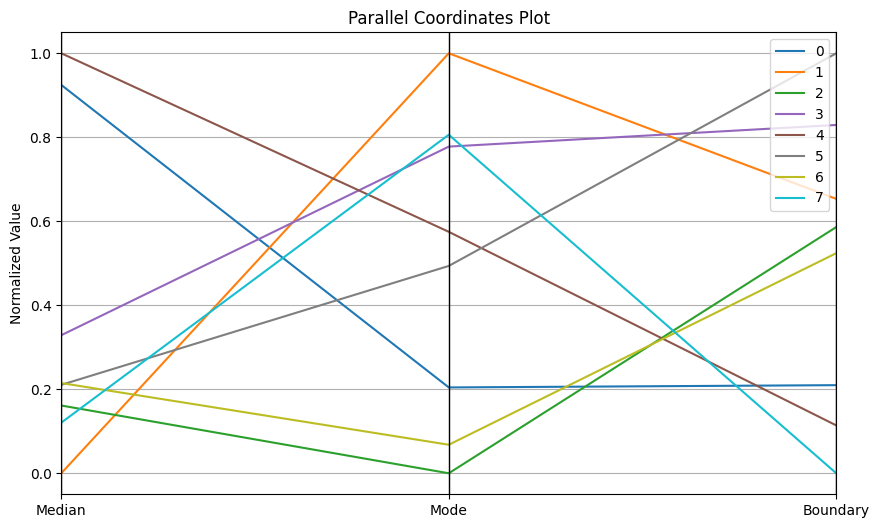

In [263]:

# Create a DataFrame from the data arrays
data = {
    'Mean': b1[:, 0],
    'Boundary': b2[:, 0],
    'Median': b3[:, 0]
}
d = pd.DataFrame(data)
normalized_d = (d - d.min()) / (d.max() - d.min())
normalized_d['Bin Index'] = range(8)
plt.figure(figsize=(10, 6))
plt.title("Parallel Coordinates Plot")
pc(normalized_d, 'Bin Index', colormap=plt.get_cmap("tab10"))
plt.xticks(range(3), ['Median', 'Mode', 'Boundary'])
plt.ylabel("Normalized Value")
plt.show()

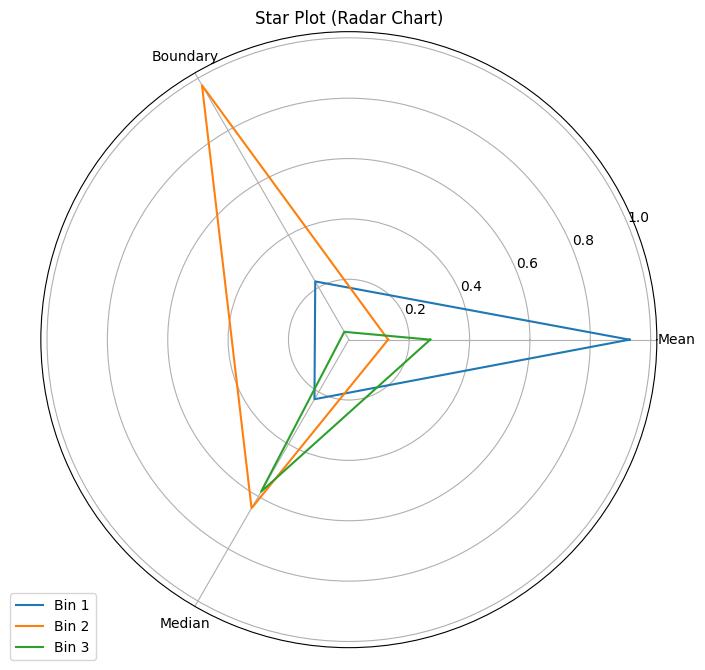

In [265]:
value_types = ['Mean', 'Boundary','Median']
values = [b1[:, 0], b2[:, 0], b3[:, 0]]
num_value_types = len(value_types)
num_bins = 3
angles = np.linspace(0, 2 * np.pi, num_value_types, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
for i in range(num_bins):
    values_i = [values[j][i] for j in range(num_value_types)]
    values_i.append(values_i[0])  
    ax.plot(angles, values_i, label=f'Bin {i+1}')
ax.set_xticks(angles[:-1])
ax.set_xticklabels(value_types)
plt.title("Star Plot (Radar Chart)")
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()

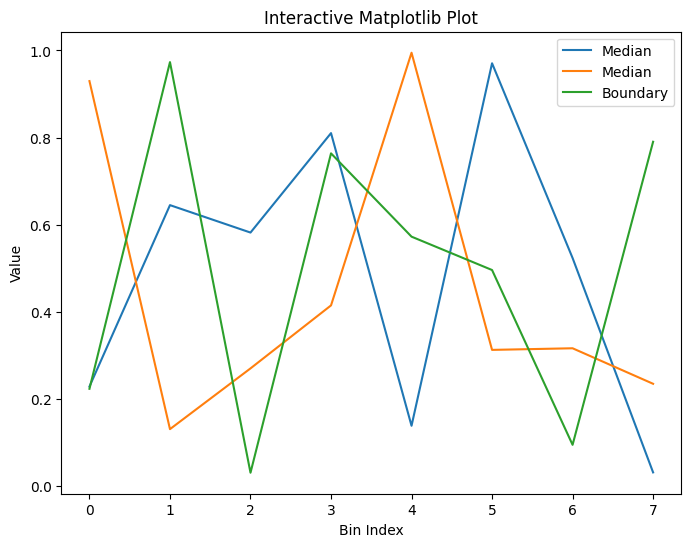

In [270]:
# diagraph
fig, ax = plt.subplots(figsize=(8, 6))
lines = ax.plot(range(len(b3)), b3[:, 0], label='Median')
lines += ax.plot(range(len(b1)), b1[:, 0], label='Median')
lines += ax.plot(range(len(b2)), b2[:, 0], label='Boundary')
ax.set_xlabel('Bin Index')
ax.set_ylabel('Value')
ax.set_title('Interactive Matplotlib Plot')
ax.legend()
canvas = FigureCanvas(fig)
# Zing Chart is web based application so it wont be used here 